## Import libs, set paths and load params

In [1]:
import os, glob
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "../src")
import auxilary_functions as f
import subprocess
import csv
import matplotlib.pyplot as plt

cfg = f.get_actual_parametrization("../src/config.json")
networks = ['gnw','fflatt']
organisms = ['ecoli','yeast','mouse','human']
organisms = ['ecoli']
#ffl_percentages = ['0.374', '0.270', '0.315', '0.347']
ffl_percentages = ['0.13'] #use 0.13
sizes = ['250','500','750', '999']
sizes = ['250','500', '750', '1000']
n_trials = 10

os.chdir('../networks')
gnwdir = '/home/erik/sweden/sonnhammer/gnw/'
fflattdir = '../snippets/'

In [2]:
print(os.getcwd())

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks


In [3]:
#collect data
topo_list = []
for network in networks:
    for number, organism in enumerate(organisms):
        for size in sizes:
            current_dir = os.path.join(os.getcwd(), network, organism, size)
            #create networks if don't exist
            if not os.path.exists(os.path.abspath(current_dir)):
                
                try:
                    print('making dirs...')
                    os.mkdir(os.path.abspath(current_dir))
                        
                except FileExistsError:
                    pass
                
                if network == 'gnw':
                    
                    print('running gnw...')
                    subprocess.call(['java', '-jar', gnwdir+'gnw-3.1.2b.jar', '--extract', '--input-net',\
                         gnwdir+'sandbox/ecoli_transcriptional_network_regulonDB_6_7.tsv',\
                        '--random-seed', '--greedy-selection', '--subnet-size='+str(size),\
                        '--num-subnets='+str(n_trials), '--output-net-format=0', '--keep-self-interactions',\
                        '-c', 'sandbox/settings.txt', '--output-path',\
                        str(current_dir)])
                    
                else:
                    print('running fflatt...')
                    #python3 test.py 103 0.4 test_networks/
                    subprocess.call(['python3', fflattdir+'test.py', size, ffl_percentages[number],\
                        str(n_trials), str(current_dir)])
                    
                for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
                    topo_list.append(f.analyze_exctracted_network(cfg, file, network, rep, size))
            
            #collect data otherwise
            else:
                for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
                    topo_list.append(f.analyze_exctracted_network(cfg, file, network, rep, size))
                    
    

making dirs...
running gnw...
making dirs...
running gnw...
making dirs...
running gnw...
making dirs...
running gnw...
making dirs...
running fflatt...
making dirs...
running fflatt...
making dirs...
running fflatt...
making dirs...
running fflatt...


## Plot for E.coli

In [4]:
df_topo = pd.DataFrame(topo_list, columns = ['ffl-nodes', 'sparsity', 'in-degree',\
                                             'out-degree', 'network', 'size', 'rep'])
df_topo

,ffl-nodes,sparsity,in-degree,out-degree,network,size,rep
0,103,2.386,1.151,1.234,gnw,250,0
1,99,2.168,1.063,1.105,gnw,250,1
2,71,1.804,0.858,0.946,gnw,250,2
3,126,1.796,0.899,0.897,gnw,250,3
4,78,1.652,0.765,0.887,gnw,250,4
...,...,...,...,...,...,...,...
75,436,2.129,0.931,1.198,fflatt,1000,5
76,597,2.427,1.091,1.336,fflatt,1000,6
77,452,2.228,0.978,1.250,fflatt,1000,7
78,529,2.227,0.980,1.247,fflatt,1000,8


<AxesSubplot:title={'center':'Out-degree'}, xlabel='size'>

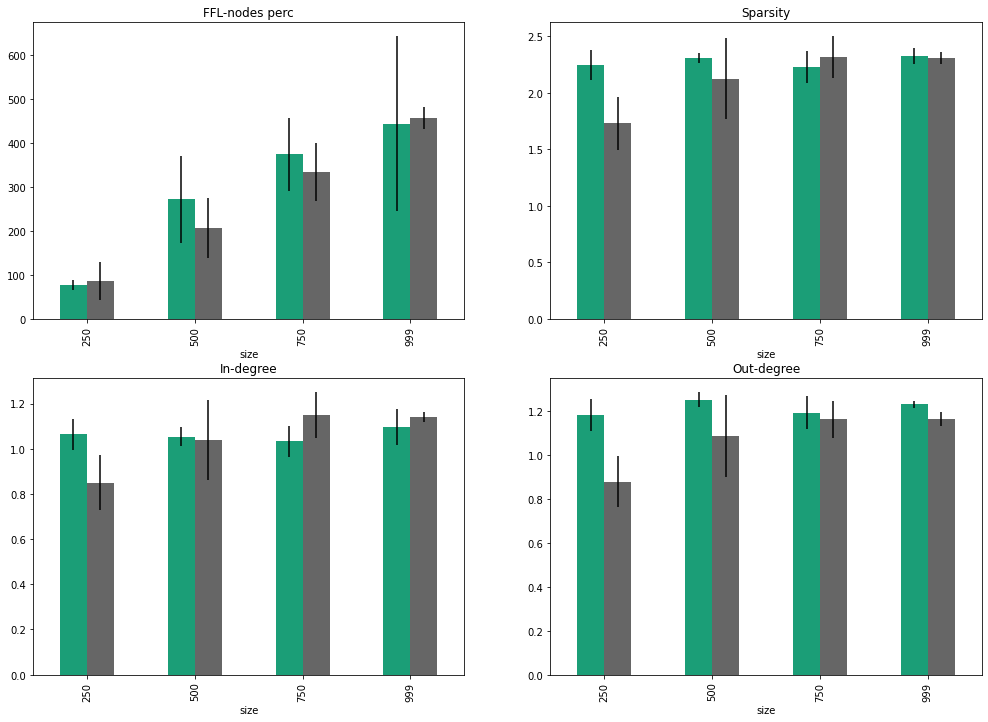

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ffl_nodes = df_topo[['ffl-nodes', 'network', 'size']]
ffl_nodes.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "ffl-nodes", legend = False,\
         yerr = np.ravel(ffl_nodes.groupby(["network", "size"]).agg(np.std)).reshape(2,len(sizes)),\
         ax=ax1, cmap='Dark2', figsize = (17,12), title = 'FFL-nodes perc')

sparsity = df_topo[['sparsity', 'network', 'size']]
sparsity.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "sparsity", legend = False,\
         yerr = np.ravel(sparsity.groupby(["network", "size"]).agg(np.std)).reshape(2,len(sizes)),\
         ax=ax2, cmap='Dark2', figsize = (17,12), title = 'Sparsity')

in_degree = df_topo[['in-degree', 'network', 'size']]
in_degree.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "in-degree", legend = False,\
         yerr = np.ravel(in_degree.groupby(["network", "size"]).agg(np.std)).reshape(2,len(sizes)),\
         ax=ax3, cmap='Dark2', figsize = (17,12), title = 'In-degree')

out_degree = df_topo[['out-degree', 'network', 'size']]
out_degree.groupby(["network", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "out-degree", legend = False,\
         yerr = np.ravel(out_degree.groupby(["network", "size"]).agg(np.std)).reshape(2,len(sizes)),\
         ax=ax4, cmap='Dark2', figsize = (17,12), title = 'Out-degree')


In [212]:
sparsity.groupby(["network", "size"]).agg(np.mean) - sparsity.groupby(["network", "size"]).agg(np.std)

sparsity
network size          
fflatt  100   2.388536
        250   2.396756
        500   2.398000
gnw     100   1.213026
        250   1.828446
        500   1.796740

In [208]:
sparsity.groupby(["network", "size"]).agg(np.mean) + sparsity.groupby(["network", "size"]).agg(np.std)

sparsity
network size          
fflatt  100   2.395464
        250   2.397911
        500   2.398000
gnw     100   2.316974
        250   2.743554
        500   2.887927

## Plot for Yeast

## Plot for Mouse

## Plot for Human